In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm



In [23]:
tips = pd.read_csv('/content/tips (data for regression problem).csv')


In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Based on the feature importance plot you shared, here are the factors that significantly impact tip amounts:

### **1.1. Factors significantly impact tip amounts.**

**Total Bill:** This is the most significant factor influencing tip amounts. The higher the total bill, the more substantial the tip tends to be. This relationship suggests that tips are likely calculated as a percentage of the bill in many cases.

**Smoker Status (Smoker_Yes):** The smoker status of the customer also impacts tipping, albeit to a lesser degree than the total bill. This could relate to customer demographics and behaviors associated with smoking.

**Party Size:** The size of the dining party has an impact on the tip amount. Larger parties often result in higher tips, likely because the bill total is larger and tipping may be split among multiple people.

**Day of the Week (Saturday and Sunday):** Weekend days, particularly Saturday and Sunday, are relevant to tipping behavior. This may be due to a relaxed dining experience or higher spending during weekends.

**Gender (Male):** Gender plays a role, with the feature indicating some correlation with tip amounts. This could be due to differing tipping habits between male and female customers.

**Time of Day (Lunch):** The time of day, specifically lunch, also has a slight influence. This could reflect different spending and tipping habits for lunch versus dinner.

**Day of the Week (Thursday):** Although this is a less significant factor, it still contributes to tipping behavior to a minor extent.

The primary driver of tip amounts is the total bill, while factors such as smoker status, party size, and specific days (weekends) also play a role. These insights can help in understanding the dynamics of tipping behavior in the restaurant setting.

In [25]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [26]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [27]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [28]:
tips = pd.get_dummies(tips, drop_first=True)


In [29]:
X = tips.drop('tip', axis=1)
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **1.2.Model Building and Evaluation**

In [30]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2


In [31]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_rmse, ridge_r2 = evaluate_model(ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_rmse, lasso_r2 = evaluate_model(lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_rmse, dt_r2 = evaluate_model(dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_rmse, rf_r2 = evaluate_model(rf, X_test, y_test)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_rmse, svr_r2 = evaluate_model(svr, X_test, y_test)

# KNN Regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_rmse, knn_r2 = evaluate_model(knn, X_test, y_test)


In [32]:
# Define and train the models as shown previously

# Evaluate each model and print the results
models = {
    "Linear Regression": lr,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Support Vector Regression": svr,
    "K-Nearest Neighbors": knn
}

for model_name, model in models.items():
    rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{model}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print("-" * 30)


LinearRegression():
  RMSE: 0.84
  R^2 Score: 0.44
------------------------------
Ridge():
  RMSE: 0.84
  R^2 Score: 0.44
------------------------------
Lasso(alpha=0.1):
  RMSE: 0.77
  R^2 Score: 0.53
------------------------------
DecisionTreeRegressor(random_state=42):
  RMSE: 1.12
  R^2 Score: -0.00
------------------------------
RandomForestRegressor(random_state=42):
  RMSE: 0.96
  R^2 Score: 0.26
------------------------------
SVR():
  RMSE: 0.73
  R^2 Score: 0.57
------------------------------
KNeighborsRegressor():
  RMSE: 0.94
  R^2 Score: 0.30
------------------------------


**Random Forest**

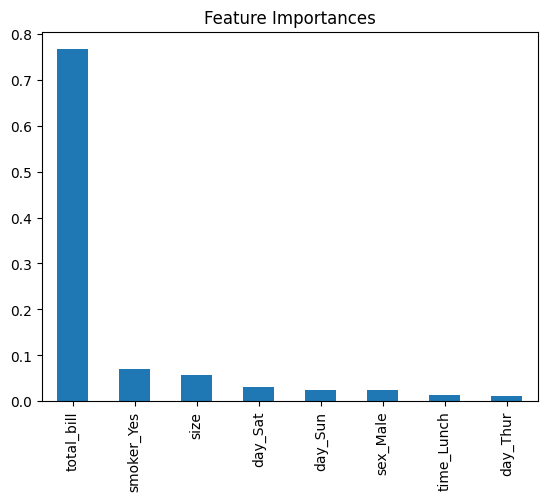

In [33]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()



### **1.3.Insights for Management:**

**1. Prioritize Total Bill to Maximize Tips Total Bill:**

The chart shows that the total bill is the most influential factor in determining tip amounts. To leverage this, train staff to subtly encourage customers to order additional items (like appetizers, desserts, or premium drinks). Upselling can increase the total bill, which, in turn, is likely to increase the tip.

**2. Consider Implementing Non-Smoking Sections Smoker Status:**

 The presence of smokers is also a factor influencing tip amounts. If customers who smoke tend to tip differently, the restaurant might consider setting up separate smoking and non-smoking sections or evaluating how smoking policies impact customer satisfaction and tips. Providing a comfortable, well-ventilated smoking area could cater to smokers while retaining a welcoming environment for non-smokers.

**3. Optimize for Larger Group Sizes Group Size:**

Larger parties are associated with higher tips. Management can use this insight to create group dining promotions or offer discounts for larger parties to attract them. This could increase overall revenue and improve customer satisfaction for group diners.

**4. Focus on Weekend Service Quality Weekend Days (Saturday and Sunday):**
Since Saturday and Sunday appear as notable features, consider focusing on enhancing service quality and creating special weekend promotions. Ensuring sufficient staffing and smooth operations on weekends can help maximize customer satisfaction and tips.

### **2. The relationship between the target variable and predictors.**
**2.1. Scatter Plot**

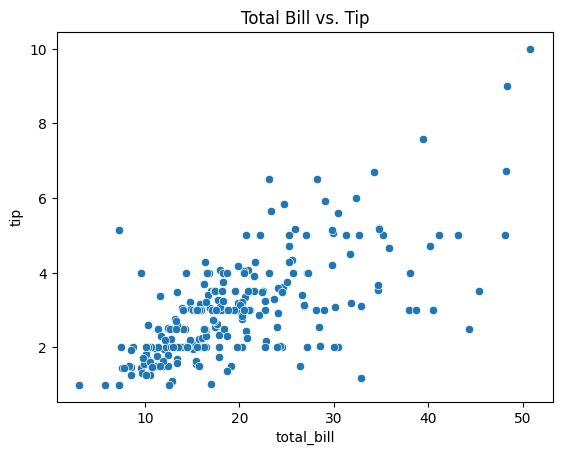

In [34]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Total Bill vs. Tip")
plt.show()


**2.2. Pairplot**

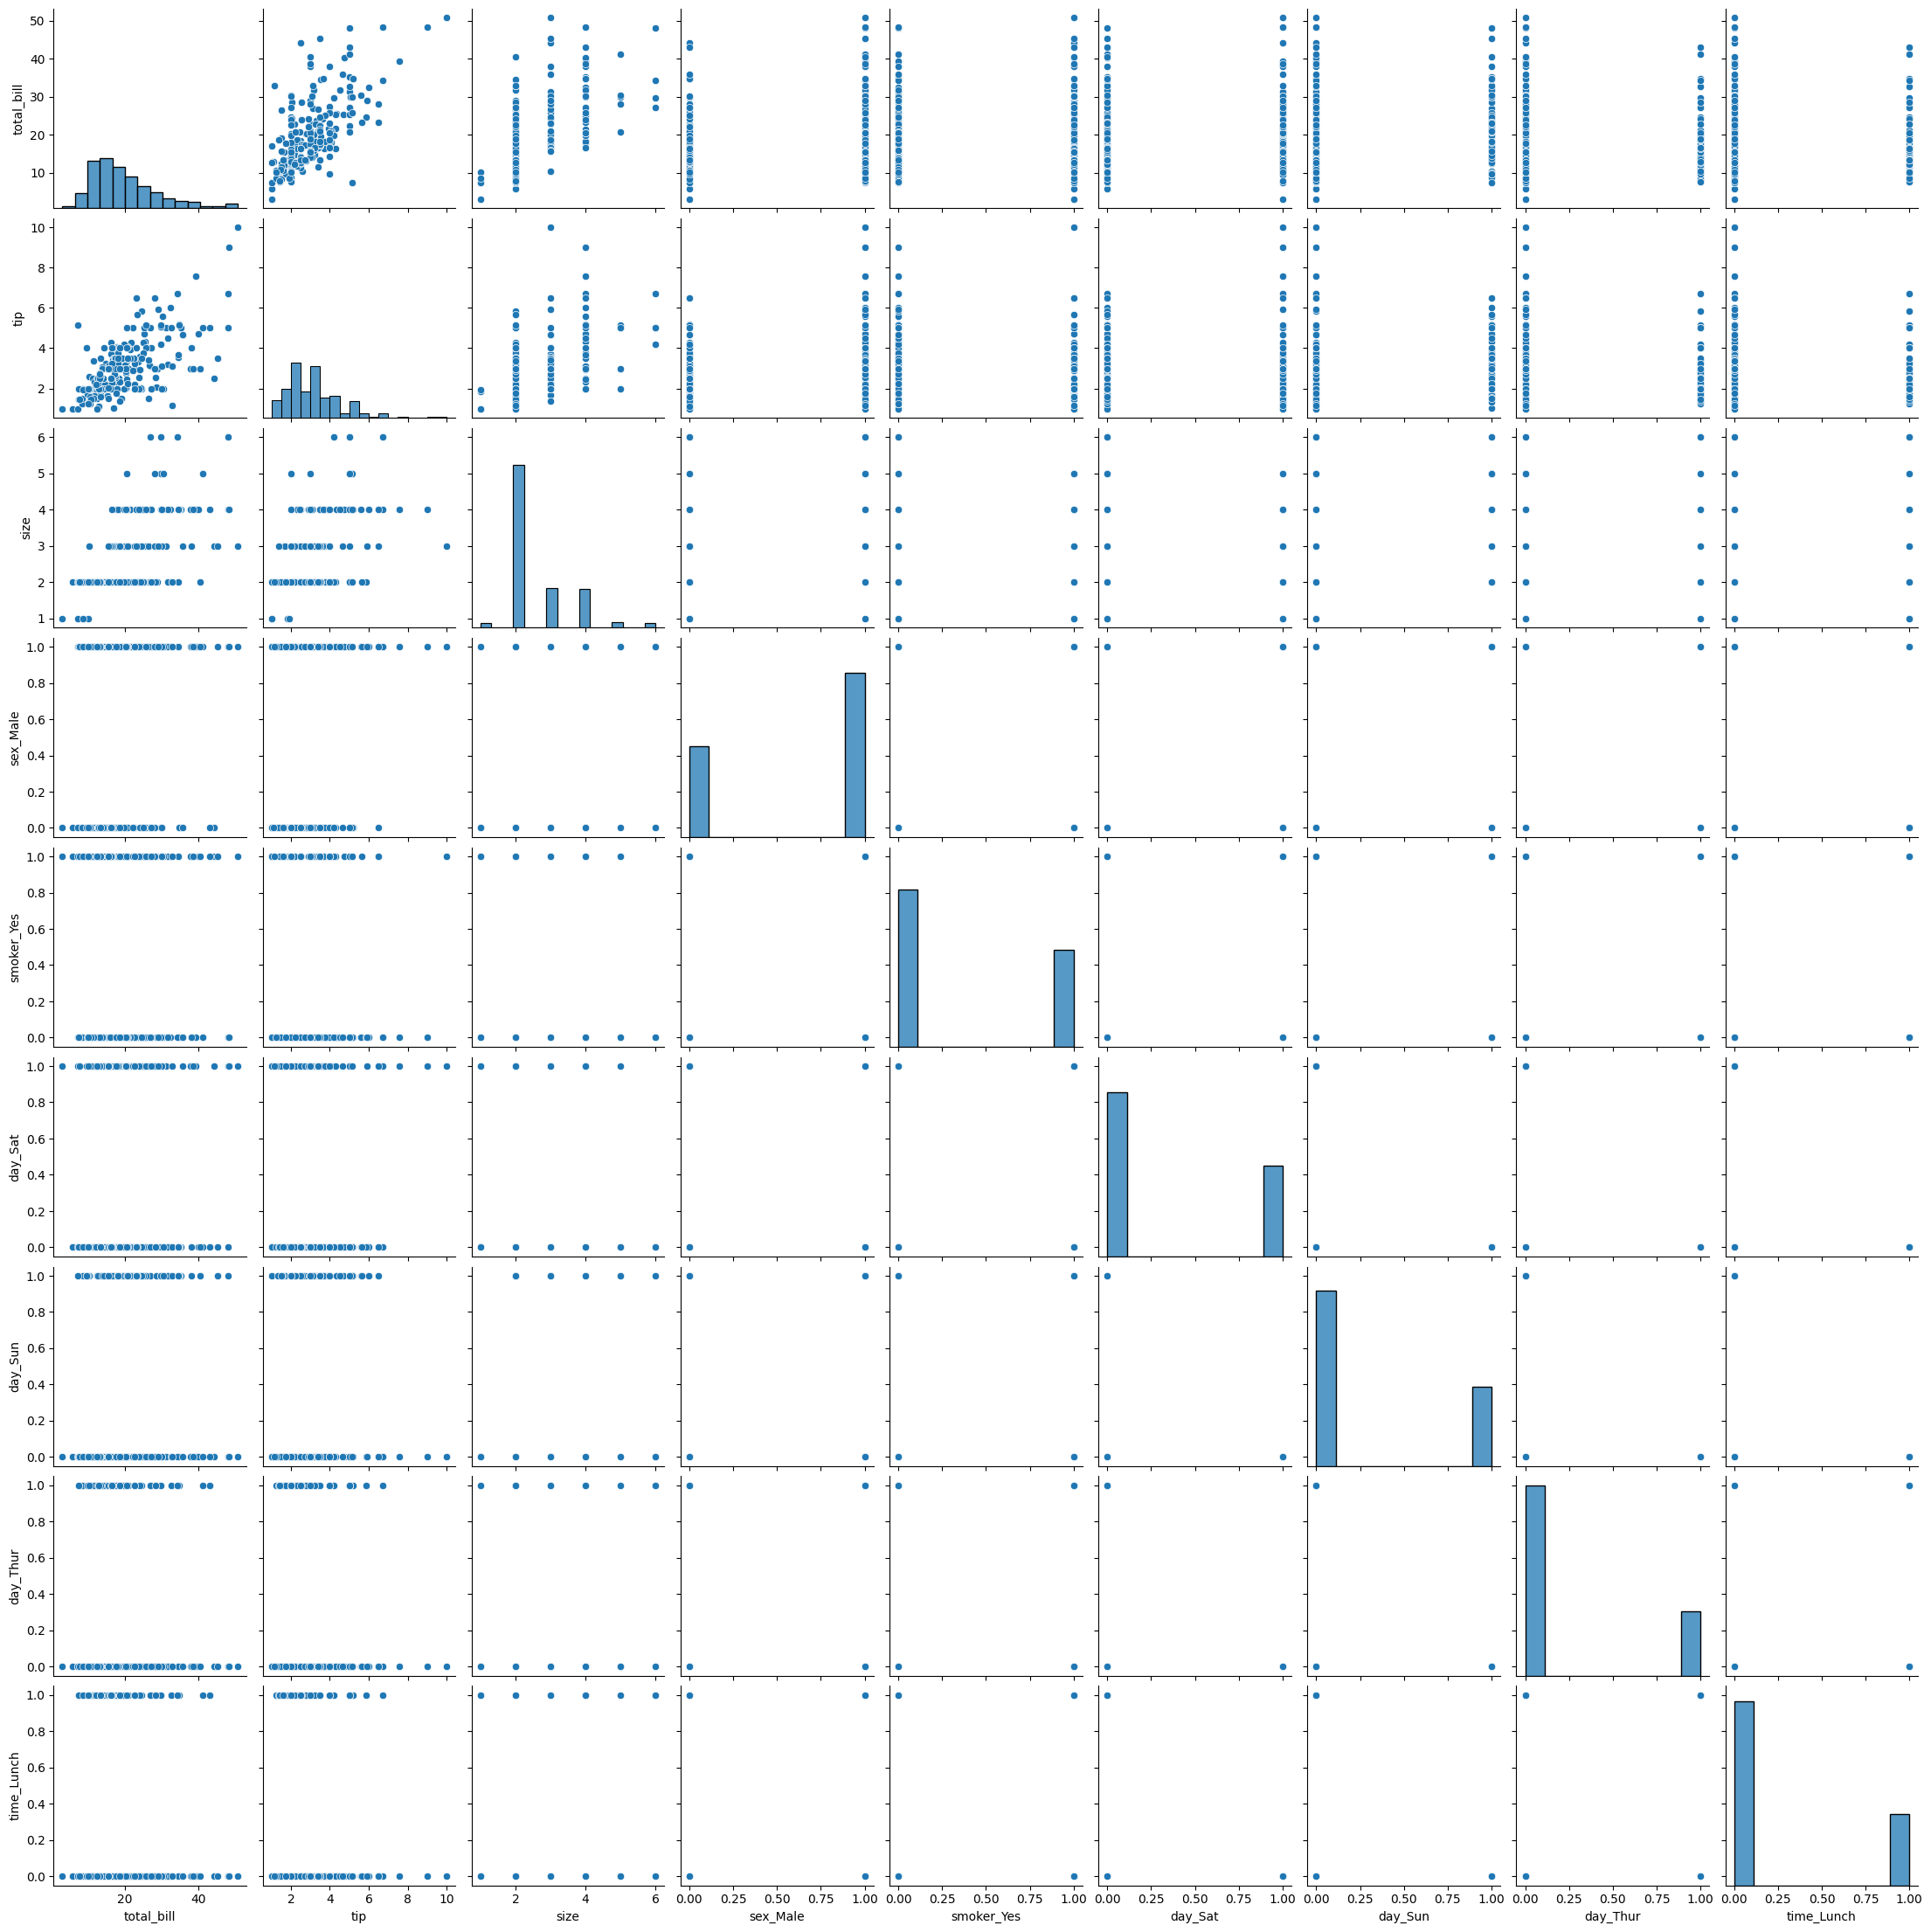

In [35]:
sns.pairplot(tips)
plt.show()


**2.3. Correlation Matrix**

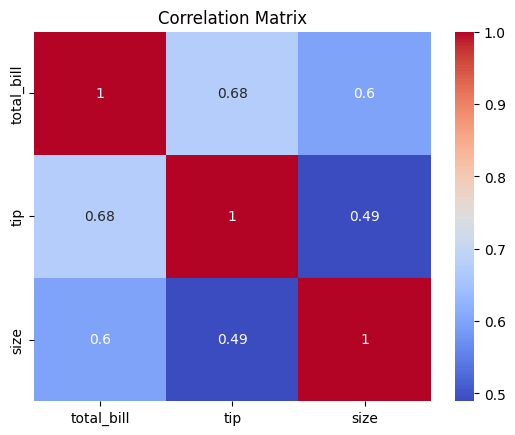

In [36]:
# Select only numerical features for correlation calculation
numerical_features = tips.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**2.4. Rainbow Test for Linearity**

In [37]:
import statsmodels.formula.api as smf

model = smf.ols('tip ~ total_bill', data=tips).fit()
rainbow_stat, rainbow_p_value = sm.stats.linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-Value:", rainbow_p_value)


Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-Value: 0.1291192152551375


**2.5. Residual Plot**

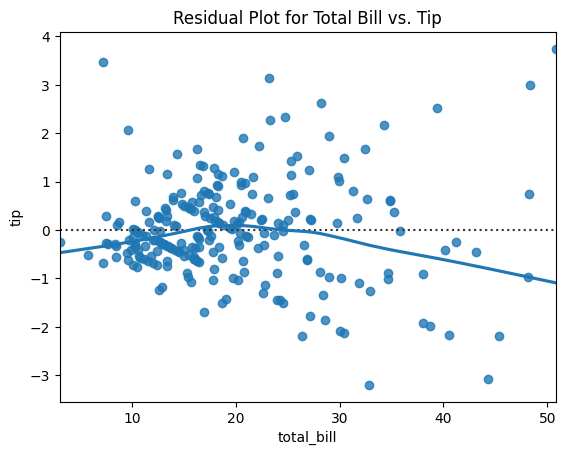

In [38]:
sns.residplot(x='total_bill', y='tip', data=tips, lowess=True)
plt.title("Residual Plot for Total Bill vs. Tip")
plt.show()


**2.6. Line Plot (for Time-Series Data)**

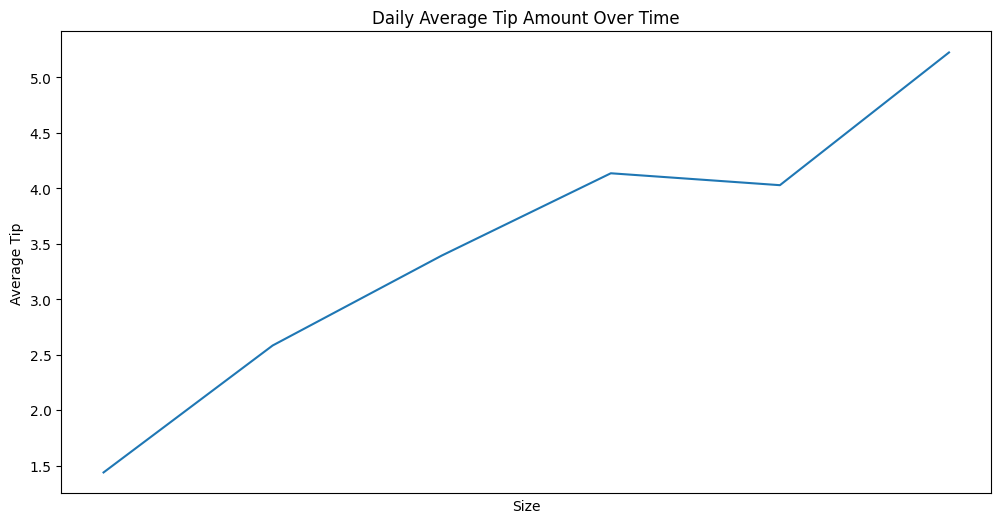

In [39]:
# Hypothetical code if there was a date column in the data
tips['size'] = pd.to_datetime(tips['size'])
daily_avg_tip = tips.groupby('size')['tip'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_tip)
plt.title("Daily Average Tip Amount Over Time")
plt.xlabel("Size")
plt.ylabel("Average Tip")
plt.show()


**2.7. Coefficient Analysis for Linear Models**

In [40]:
print("Linear Regression Coefficients:")
pd.Series(lr.coef_, index=X.columns)


Linear Regression Coefficients:


,0
total_bill,0.094700
size,0.233484
sex_Male,0.028819
smoker_Yes,-0.192353
day_Sat,-0.185785
day_Sun,-0.050793
day_Thur,-0.179721
time_Lunch,0.094957


**Linear Regression**

In [41]:
X = tips[['total_bill']]  # Example using `total_bill` as a predictor
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
predictions = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Linear Regression Results:")
print("RMSE:", rmse)
print("R^2 Score:", r2)


Linear Regression Results:
RMSE: 0.7541977545199625
R^2 Score: 0.5449381659234664
